In [3]:
import sympy as sy

In [4]:
x,xa,xb,x0 = sy.symbols("x,x_a,x_b,x_0",positive=True)
Q,alf,s,A,b = sy.symbols("Q_q,alpha,s,A,b",positive=True)
ndv,xdv = sy.symbols("ndv,xdv",positive=True)

# Aufgabe 8.1

1) Drell-Yan Parton x-section.   
Add factor 1/9 for average over incoming colour

In [5]:
sigdy = (Q**2/sy.Rational(9)) * 4*sy.pi*alf**2/(xa*xb*s)
sigdy

4*pi*Q_q**2*alpha**2/(9*s*x_a*x_b)

2) Define parton density functions with parameters A, b

In [6]:
fa=A*xa*(1-xa)**b
fb=A*xb*(1-xb)**b
display(fa)
display(fb)

A*x_a*(1 - x_a)**b

A*x_b*(1 - x_b)**b

3. Integrate over full x-range

In [7]:
sig = sy.integrate(fa*fb*sigdy,(xa,0,1),(xb,0,1))
sig

4*pi*A**2*Q_q**2*alpha**2/(9*s*(b + 1)**2)

4. Integrate over $x_0 < x < 1$

In [8]:
sigm = sy.integrate(fa*fb*sigdy,(xa,x0,1),(xb,x0,1))
sigm

4*pi*A**2*Q_q**2*alpha**2*(1 - x_0)**(2*b + 2)/(9*s*(b + 1)**2)

5. Numeric calculation for d valence quark
- normalization for d-quark $n_d=\int_0^1 dx~d(x) = 1$
- average momentum $x_d =  \int_0^1 dx~x d(x)$

In [9]:
# solve
nd = sy.integrate(fa,(xa,0,1))
xd = sy.integrate(xa*fa,(xa,0,1))
nd0 = 1
xd0 = 0.1
sold=sy.solve({nd-nd0,xd-xd0},{A,b})
A0 = sold[0][A]; print("A: ",A0)
b0 = sold[0][b]; print("b: ",b0)

A:  342.000000000000
b:  17.0000000000000


In [10]:
# numerical calculation; result is in 1/GeV**2
# multiply with 0.389e6 GeV**2 nb
dsubs={A:A0, b:b0, Q:-1/3,alf:1/137, x0:0.01,s:900}
signb = sigm.subs(dsubs).evalf()*0.389e6
print("Cross section (nb): ",signb) 

Cross section (nb):  0.898183370746387


# Supplement

In [11]:
# check nd, xd
print("nd: ",nd.subs(dsubs).evalf())
print("xd: ",xd.subs(dsubs).evalf())

nd:  1.00000000000000
xd:  0.100000000000000


Compare this simplified parametrisation to Kap 5.3, 
 dv-quark parton density

$$d_v = 0.67 x^{0.4}*(1-x^{1.51})^{4.5}/x$$

0.67*(1 - x**1.51)**4.5/x**0.6

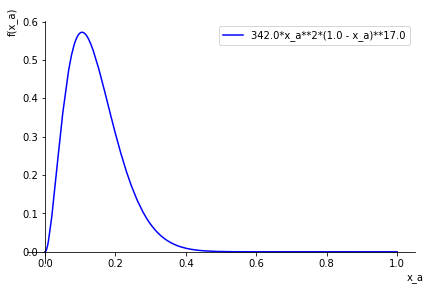

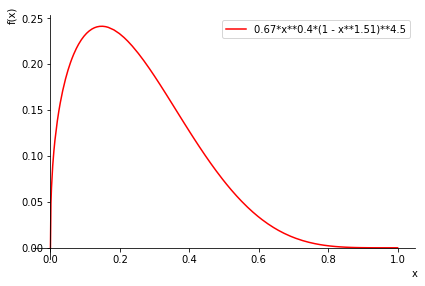

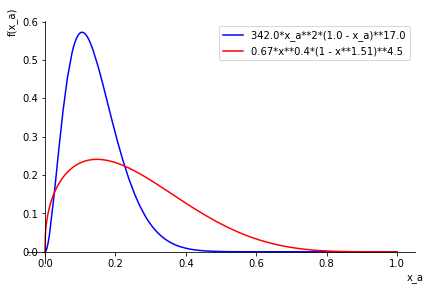

In [13]:
# plot f_d and compare with pdf in Kap. 5.3
dv = 0.67* x**0.4 * (1-x**1.51)**4.5/x
display(dv)
pl1 = sy.plotting.plot(xa*fa.subs(dsubs).evalf(),(xa,0,1), line_color="blue", legend=True)
pl2 = sy.plotting.plot(x*dv,(x,0,1),line_color="red", legend=True)
pl1.extend(pl2)
pl1.show()

The averave x and the normalizations are identical, 
but the shapes are very different.

In [15]:
# calculate x-sec with dv
# interesting to see that sympy is also able to integrate the realistic pdf dv
dva = 0.67*xa**0.4*(1-xa**1.51)**4.5/xa
dvb = 0.67*xb**0.4*(1-xb**1.51)**4.5/xb
sigv = sy.integrate((dva*dvb*sigdy).evalf(),(xa,0.01,1),(xb,0.01,1))
sy.re(sigv.subs(dsubs)).evalf()*0.389e6

0.767507428412692